# Importe librerias 

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score
from seaborn import heatmap
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

# Funciones 

## Entrenamiento

In [87]:
def entrenamiento_and_report_simple(data_entrenamiento,objetivo,cv,modelo):
    predict_list = cross_val_predict(modelo,data_entrenamiento,objetivo, cv=cv)
    confution = confusion_matrix( y.tolist(),  predict_list.tolist())
    matriz_confusion = confusion_matrix(predict_list, objetivo)
    heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Expected")
    plt.figure()
    print(f"Classification report:\n{classification_report(predict_list, objetivo)}")

In [88]:
def entrenamiento_and_report_red_neuronal(data_entrenamiento,objetivo,cv,modelo):
    predict_list = cross_val_predict(modelo,data_entrenamiento,objetivo, cv=cv)
    confution = confusion_matrix( y.tolist(),  predict_list.tolist())
    matriz_confusion = confusion_matrix(predict_list, objetivo)
    heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Expected")
    plt.figure()
    print(f"Classification report:\n{classification_report(predict_list, objetivo)}")

## Optimizacion de parametros

In [89]:
def Optimizacion_parametros(param_grid,Modelo,data_entrenamiento,objetivo,cv):
    grid_search = GridSearchCV(Modelo, param_grid, cv=cv,
                           scoring='precision', 
                           return_train_score=True)
    grid_search.fit(data_entrenamiento, objetivo)
    a = pd.DataFrame(grid_search.cv_results_['params'])
    a = pd.DataFrame(grid_search.cv_results_['params'])
    a['mean_train_score'] = grid_search.cv_results_['mean_train_score']
    a['mean_test_score'] = grid_search.cv_results_['mean_test_score']
    a['std_train_score'] = grid_search.cv_results_['std_train_score']
    a['std_test_score'] = grid_search.cv_results_['std_test_score']
    print('Mejor resultado' +''+ str(grid_search.best_score_)  )     
    print('Mejor parametro' +''+ str(grid_search.best_estimator_)) 
    minv = grid_search.best_score_
    return a, a[(a.mean_test_score == minv)],grid_search.best_estimator_,grid_search.best_score_



# Funcion PCA

In [90]:
def PCA_conversion(datos,Numero_parametros, nombre_variable):
    scaler=StandardScaler()#normalizamos los datos
    scaler.fit(datos) # calculo la media para poder hacer la transformacion
    X_scaled=scaler.transform(datos)# Ahora si, escalo los datos y los normalizo
    pca=PCA(n_components=Numero_parametros) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
    pca.fit(X_scaled) # obtener los componentes principales
    ear2_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PC
    
    print("shape of X_pca", ear2_pca.shape)
    expl = pca.explained_variance_ratio_
    print(expl)
    print('suma:',sum(expl[0:5]))
    print("shape of X_pca", ear2_pca.shape)
    expl = pca.explained_variance_ratio_
    print(expl)
    
    print('suma:',sum(expl[0:1000]))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
    
    x = range(1, Numero_parametros + 1)
    new_columns = []
    for n in x:
        name = 'nombre_variable' +  str(n)
        new_columns.append(name)

    bm = pd.DataFrame(data = ear2_pca, columns = new_columns)
    bm.index = np.arange(1,len(bm)+1)
    return bm

## Carga de datos

In [91]:
path_dataset = 'archive/earLobe.csv'
ear = pd.read_csv(path_dataset)
ear = ear.iloc[1:]
y = ear['has_DM2']
path_dataset = 'archive/earData.csv'
ear2 = pd.read_csv(path_dataset)
ear2= (ear2.T.reset_index().T.reset_index(drop=True)
            .set_axis([f'Q1.{i+1}' for i in range(ear2.shape[1])], axis=1))
ear2= ear2.apply(pd.to_numeric, errors='coerce')

In [92]:
ear2

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q1.992,Q1.993,Q1.994,Q1.995,Q1.996,Q1.997,Q1.998,Q1.999,Q1.1000,Q1.1001
0,0.702765,0.701368,0.667048,0.604416,0.577726,0.634734,0.687919,0.715483,0.739139,0.746792,...,0.656006,0.595486,0.684535,0.877535,0.961894,0.787723,0.714738,0.680261,0.774981,0.783097
1,0.471525,0.524410,0.568239,0.605762,0.612155,0.544626,0.478929,0.498340,0.515025,0.496139,...,0.775739,0.683028,0.543678,0.685557,0.845753,1.004187,0.965871,0.814745,0.813595,0.835334
2,-0.304119,-0.329874,-0.328211,-0.303235,-0.292722,-0.315869,-0.336498,-0.338597,-0.339091,-0.331862,...,0.092331,-0.100294,-0.327556,-0.367145,-0.355185,-0.256518,-0.081632,0.124483,-0.137621,-0.293826
3,2.371092,2.344028,2.330286,2.330452,2.338351,2.363721,2.374656,2.356758,2.328415,2.327067,...,1.531869,1.656178,1.779324,1.679249,1.627818,1.718848,1.680798,1.552492,1.672337,1.728359
4,-1.071678,-1.136116,-1.152072,-1.127834,-1.108201,-1.097930,-1.084849,-1.115330,-1.139999,-1.133657,...,-0.939648,-1.023997,-0.935870,-0.900399,-0.857890,-0.791606,-0.837238,-0.922385,-0.960556,-0.917655
5,-0.757493,-0.881897,-0.947065,-0.963483,-0.935687,-0.801047,-0.678111,-0.806289,-0.927893,-0.880020,...,-1.480587,-1.497094,-1.444186,-1.495180,-1.420438,-1.048910,-1.098618,-1.332784,-1.371605,-1.373746
6,0.281720,0.256200,0.276378,0.336700,0.367127,0.327887,0.290009,0.306102,0.320428,0.320460,...,-0.150902,-0.135172,-0.193984,-0.097970,-0.036366,-0.075122,0.034579,0.211226,0.055421,-0.017519
7,-0.645666,-0.612284,-0.603704,-0.617051,-0.633431,-0.657477,-0.676535,-0.669100,-0.658751,-0.650908,...,-0.495612,-0.479561,-0.539813,-0.433840,-0.355641,-0.364685,-0.442925,-0.540997,-0.326906,-0.233579
8,0.130734,0.168928,0.199051,0.223026,0.236705,0.226487,0.218878,0.263196,0.305313,0.280778,...,0.416382,0.425467,0.173475,0.241827,0.269691,0.158472,0.293291,0.538672,0.434451,0.377685
9,0.178527,0.212390,0.236086,0.251745,0.247284,0.194704,0.146584,0.187074,0.225799,0.222365,...,1.539563,1.443508,1.236146,1.229712,1.265253,1.364019,1.474631,1.561823,1.497067,1.423241


# Optimizacion de modelo

## XGBClassifier

In [93]:
from xgboost import XGBClassifier

In [94]:
param_grid = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [95]:
XGBClassifier = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [96]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,XGBClassifier,ear2,y,5)

[21:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [97]:
best_score

1.0

In [98]:
best_stimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [99]:
total_parametros

,max_depth,min_child_weight,mean_train_score,mean_test_score,std_train_score,std_test_score
0,3,1,1.00,1.0,0.000,0.0
1,3,3,0.45,0.4,0.225,0.2
2,3,5,0.00,0.0,0.000,0.0
3,5,1,1.00,1.0,0.000,0.0
4,5,3,0.45,0.4,0.225,0.2
5,5,5,0.00,0.0,0.000,0.0
6,7,1,1.00,1.0,0.000,0.0
7,7,3,0.45,0.4,0.225,0.2
8,7,5,0.00,0.0,0.000,0.0
9,9,1,1.00,1.0,0.000,0.0


In [100]:
mejores_parametros

,max_depth,min_child_weight,mean_train_score,mean_test_score,std_train_score,std_test_score
0,3,1,1.0,1.0,0.0,0.0
3,5,1,1.0,1.0,0.0,0.0
6,7,1,1.0,1.0,0.0,0.0
9,9,1,1.0,1.0,0.0,0.0


## Adabost

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [102]:
param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

In [103]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [104]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,ada_clf,ear2,y,5)

Mejor resultado1.0
Mejor parametroAdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01, n_estimators=10)


In [105]:
best_score

1.0

In [106]:
best_stimator

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01, n_estimators=10)

In [107]:
total_parametros

,base_estimator__max_depth,base_estimator__min_samples_leaf,learning_rate,n_estimators,mean_train_score,mean_test_score,std_train_score,std_test_score
0,2,5,0.01,10,1.00,1.0,0.000,0.0
1,2,5,0.01,50,1.00,1.0,0.000,0.0
2,2,5,0.01,250,1.00,1.0,0.000,0.0
3,2,5,0.01,1000,1.00,1.0,0.000,0.0
4,2,5,0.10,10,1.00,1.0,0.000,0.0
...,...,...,...,...,...,...,...,...
75,10,10,0.01,1000,0.45,0.4,0.225,0.2
76,10,10,0.10,10,0.45,0.4,0.225,0.2
77,10,10,0.10,50,0.45,0.4,0.225,0.2
78,10,10,0.10,250,0.45,0.4,0.225,0.2


## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
param_grid ={'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400, 600, 800]}

In [110]:
RandomForestClassifier = RandomForestClassifier()

In [111]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,RandomForestClassifier,ear2,y,5)

Mejor resultado1.0
Mejor parametroRandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)


In [112]:
best_score

1.0

In [113]:
best_stimator

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

In [114]:
total_parametros

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,mean_train_score,mean_test_score,std_train_score,std_test_score
0,True,10,auto,2,2,200,1.0,1.0,0.0,0.0
1,True,10,auto,2,2,400,1.0,1.0,0.0,0.0
2,True,10,auto,2,2,600,1.0,1.0,0.0,0.0
3,True,10,auto,2,2,800,1.0,1.0,0.0,0.0
4,True,10,auto,2,5,200,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
123,False,20,sqrt,4,2,800,1.0,1.0,0.0,0.0
124,False,20,sqrt,4,5,200,1.0,1.0,0.0,0.0
125,False,20,sqrt,4,5,400,1.0,1.0,0.0,0.0
126,False,20,sqrt,4,5,600,1.0,1.0,0.0,0.0


## SVM

In [115]:
from sklearn.svm import SVC

In [116]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [117]:
svc = SVC()

In [118]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,svc,ear2,y,5)

Mejor resultado1.0
Mejor parametroSVC(C=1, gamma=0.0001)


In [119]:
best_score

1.0

In [120]:
best_stimator

SVC(C=1, gamma=0.0001)

In [121]:
total_parametros

,C,gamma,kernel,mean_train_score,mean_test_score,std_train_score,std_test_score
0,1,0.0010,rbf,1.0,0.9,0.0,0.2
1,1,0.0001,rbf,1.0,1.0,0.0,0.0
2,10,0.0010,rbf,1.0,0.9,0.0,0.2
3,10,0.0001,rbf,1.0,1.0,0.0,0.0
4,100,0.0010,rbf,1.0,0.9,0.0,0.2
5,100,0.0001,rbf,1.0,1.0,0.0,0.0
6,1000,0.0010,rbf,1.0,0.9,0.0,0.2
7,1000,0.0001,rbf,1.0,1.0,0.0,0.0
8,1,NaN,linear,1.0,1.0,0.0,0.0
9,10,NaN,linear,1.0,1.0,0.0,0.0


# Creacion de modelos

## XGBClassifier 

In [122]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

## Adabost

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01, n_estimators=10)

## Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

## SVM

In [125]:
from sklearn.svm import SVC
svc = SVC(C=1, gamma=0.0001)

## Red neuronal

In [126]:
from keras.models import Sequential
from keras import layers

max_features = ear2.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                16032     
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 16,321
Trainable params: 16,321
Non-trainable params: 0
_________________________________________________________________


# Spectograma despues del Filtro vancouver

In [127]:
path_dataset = 'archive/earData.csv'
eardata = pd.read_csv(path_dataset)
eardata= (eardata.T.reset_index().T.reset_index(drop=True)
            .set_axis([f'Q1.{i+1}' for i in range(eardata.shape[1])], axis=1))
eardata= eardata.apply(pd.to_numeric, errors='coerce')

## XGBClassifier 

[21:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

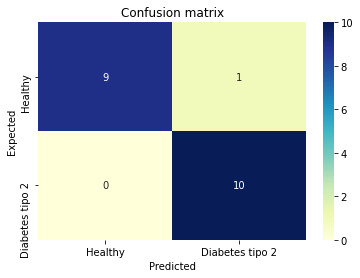

<Figure size 432x288 with 0 Axes>

In [128]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



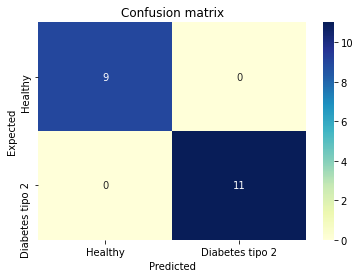

<Figure size 432x288 with 0 Axes>

In [129]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



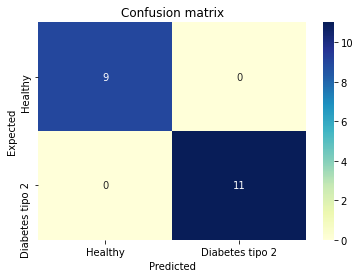

<Figure size 432x288 with 0 Axes>

In [130]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



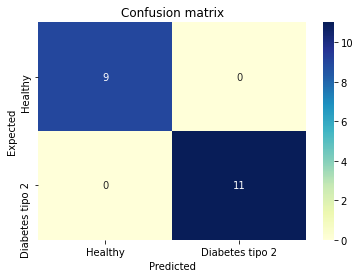

<Figure size 432x288 with 0 Axes>

In [131]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



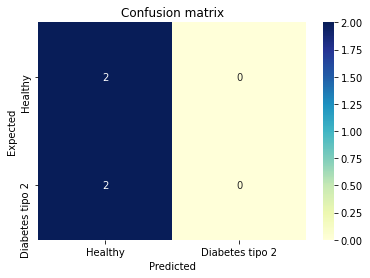

<Figure size 432x288 with 0 Axes>

In [132]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

In [133]:
y_test

1     1.0
18    0.0
16    0.0
2     1.0
Name: has_DM2, dtype: float64

# Spectograma despues del Filtro vancouver con PCA

shape of X_pca (20, 5)
[9.92078839e-01 4.22096354e-03 1.14159336e-03 6.34535881e-04
 3.73851636e-04]
suma: 0.998449783323415
shape of X_pca (20, 5)
[9.92078839e-01 4.22096354e-03 1.14159336e-03 6.34535881e-04
 3.73851636e-04]
suma: 0.998449783323415


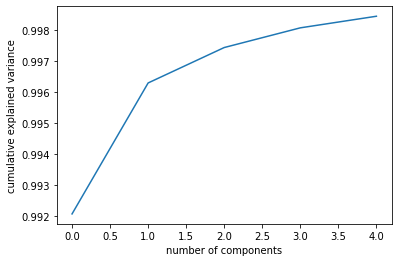

In [134]:
eardata = PCA_conversion(eardata,5,"Ear")

## XGBClassifier

[21:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

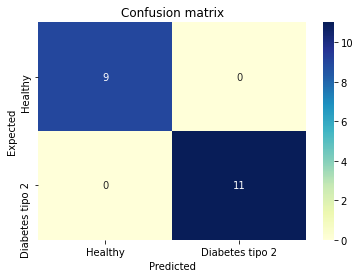

<Figure size 432x288 with 0 Axes>

In [135]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



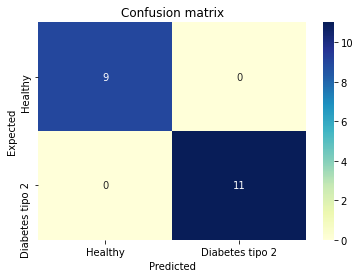

<Figure size 432x288 with 0 Axes>

In [136]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



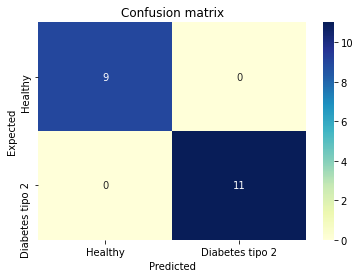

<Figure size 432x288 with 0 Axes>

In [137]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



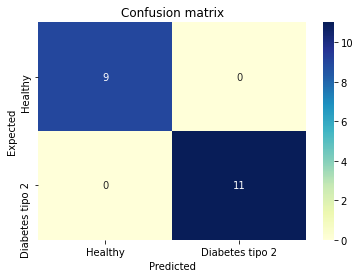

<Figure size 432x288 with 0 Axes>

In [138]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_25 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



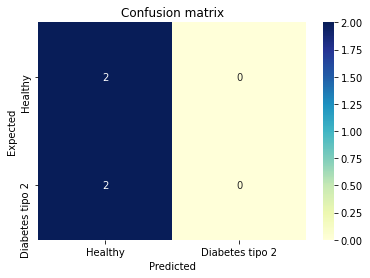

<Figure size 432x288 with 0 Axes>

In [139]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])


X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma sin Filtro vancouver

In [140]:
path_dataset = 'archive/earLobe.csv'
eardata = pd.read_csv(path_dataset)
eardata = ear.iloc[0:]
y = eardata['has_DM2']
eardata = eardata.drop('patientID', axis=1)
eardata = eardata.drop('has_DM2', axis=1)

## XGBClassifier

[21:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

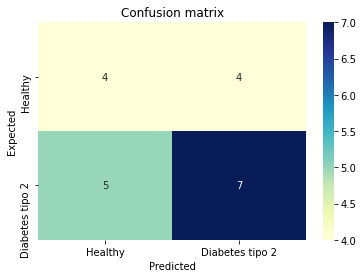

<Figure size 432x288 with 0 Axes>

In [141]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.44      0.44         9
         1.0       0.55      0.55      0.55        11

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20



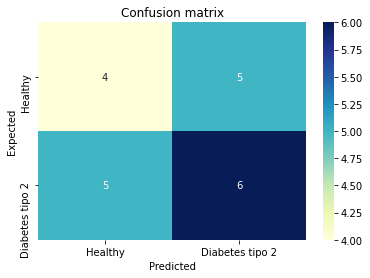

<Figure size 432x288 with 0 Axes>

In [142]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56         9
         1.0       0.64      0.64      0.64        11

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



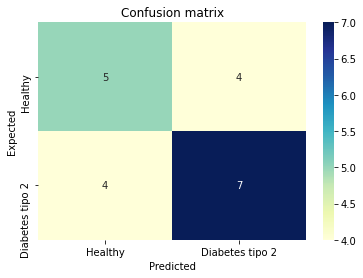

<Figure size 432x288 with 0 Axes>

In [143]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.11      0.33      0.17         3
         1.0       0.82      0.53      0.64        17

    accuracy                           0.50        20
   macro avg       0.46      0.43      0.40        20
weighted avg       0.71      0.50      0.57        20



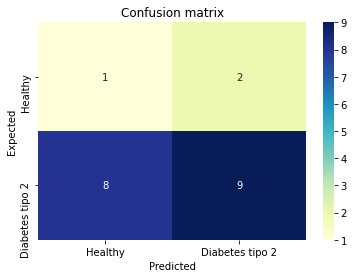

<Figure size 432x288 with 0 Axes>

In [144]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                50576     
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 50,865
Trainable params: 50,865
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



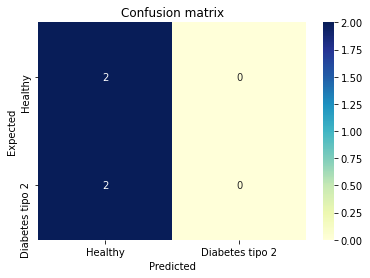

<Figure size 432x288 with 0 Axes>

In [145]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma sin Filtro vancouver con PCA

shape of X_pca (20, 5)
[0.77687972 0.17437493 0.01292235 0.00880072 0.00340806]
suma: 0.9763857840665575
shape of X_pca (20, 5)
[0.77687972 0.17437493 0.01292235 0.00880072 0.00340806]
suma: 0.9763857840665575


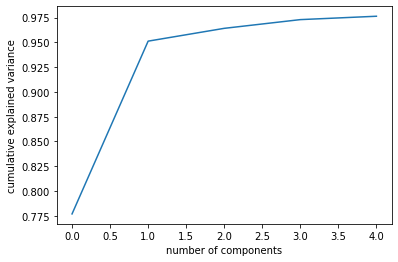

In [146]:
eardata = PCA_conversion(eardata,5,"Ear")

## XGBClassifier

[21:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

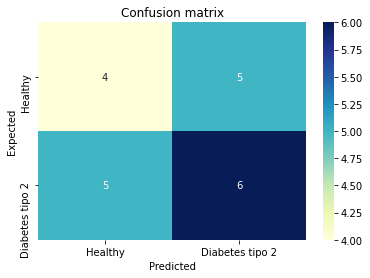

<Figure size 432x288 with 0 Axes>

In [147]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.33      0.43      0.38         7
         1.0       0.64      0.54      0.58        13

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.53      0.50      0.51        20



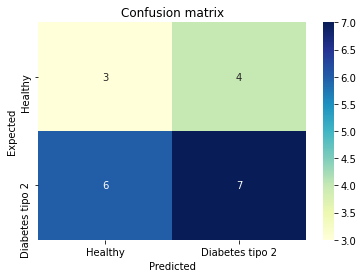

<Figure size 432x288 with 0 Axes>

In [148]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        10
         1.0       0.64      0.70      0.67        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



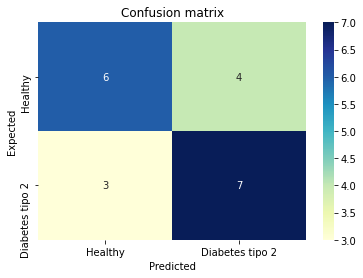

<Figure size 432x288 with 0 Axes>

In [149]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.11      0.33      0.17         3
         1.0       0.82      0.53      0.64        17

    accuracy                           0.50        20
   macro avg       0.46      0.43      0.40        20
weighted avg       0.71      0.50      0.57        20



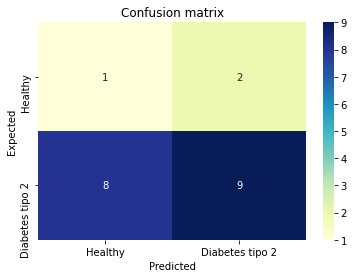

<Figure size 432x288 with 0 Axes>

In [150]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



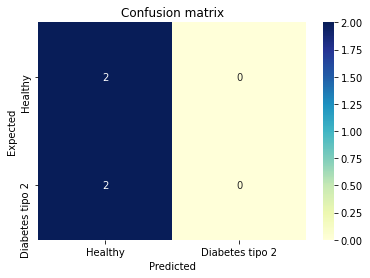

<Figure size 432x288 with 0 Axes>

In [151]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma recortado sin Filtro vancouver  

In [152]:
path_dataset = 'archive/earLobe.csv'
eardata = pd.read_csv(path_dataset)
eardata = ear.iloc[0:]
y = eardata['has_DM2']
eardata = eardata.drop('patientID', axis=1)
eardata = eardata.drop('has_DM2', axis=1)
eardata = eardata.iloc[: , 800:]
eardata = eardata.iloc[: , :1000]

## XGBClassifier

[21:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

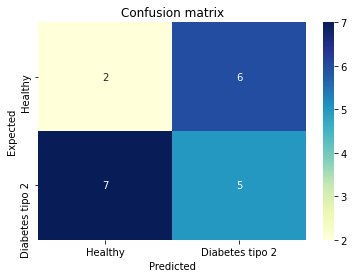

<Figure size 432x288 with 0 Axes>

In [153]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.57      0.50         7
         1.0       0.73      0.62      0.67        13

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.63      0.60      0.61        20



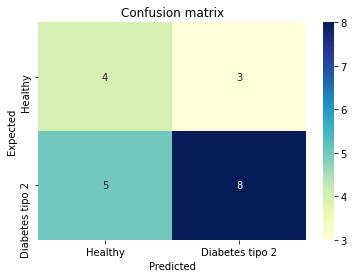

<Figure size 432x288 with 0 Axes>

In [154]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.50      0.47         8
         1.0       0.64      0.58      0.61        12

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.56      0.55      0.55        20



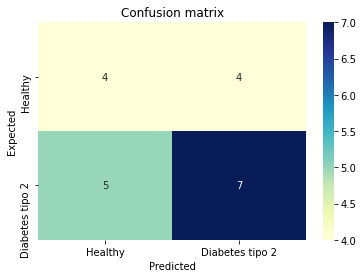

<Figure size 432x288 with 0 Axes>

In [155]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.11      1.00      0.20         1
         1.0       1.00      0.58      0.73        19

    accuracy                           0.60        20
   macro avg       0.56      0.79      0.47        20
weighted avg       0.96      0.60      0.71        20



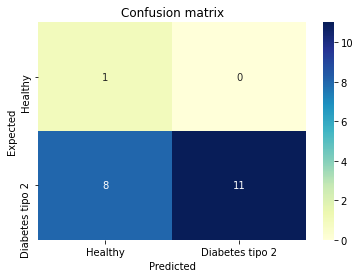

<Figure size 432x288 with 0 Axes>

In [156]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_34 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



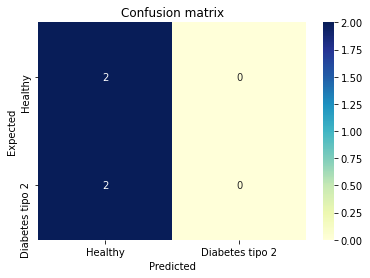

<Figure size 432x288 with 0 Axes>

In [157]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma recortado sin Filtro vancouver   con PCA

shape of X_pca (20, 5)
[0.9585326  0.02189024 0.00662545 0.00312444 0.00177617]
suma: 0.9919489084097732
shape of X_pca (20, 5)
[0.9585326  0.02189024 0.00662545 0.00312444 0.00177617]
suma: 0.9919489084097732


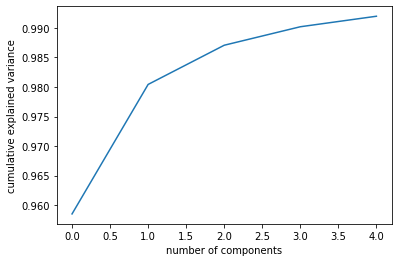

In [158]:
eardata = PCA_conversion(eardata,5,"Ear")

## XGBClassifier

[21:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

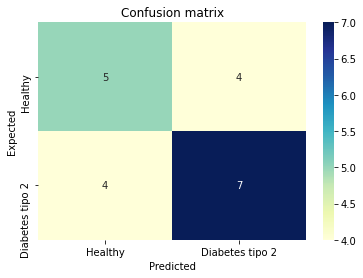

<Figure size 432x288 with 0 Axes>

In [159]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.71      0.63         7
         1.0       0.82      0.69      0.75        13

    accuracy                           0.70        20
   macro avg       0.69      0.70      0.69        20
weighted avg       0.73      0.70      0.71        20



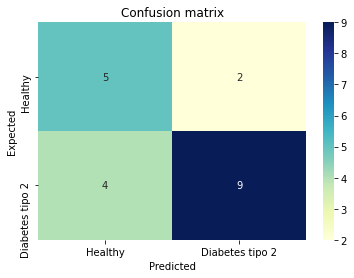

<Figure size 432x288 with 0 Axes>

In [160]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56         9
         1.0       0.64      0.64      0.64        11

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



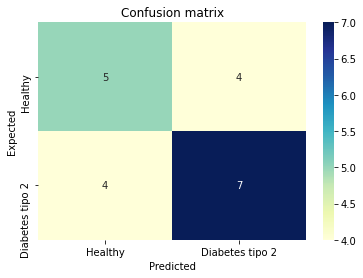

<Figure size 432x288 with 0 Axes>

In [161]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.55      0.71        20

    accuracy                           0.55        20
   macro avg       0.50      0.28      0.35        20
weighted avg       1.00      0.55      0.71        20



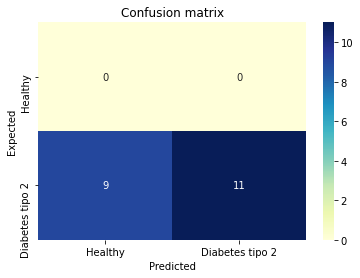

<Figure size 432x288 with 0 Axes>

In [162]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



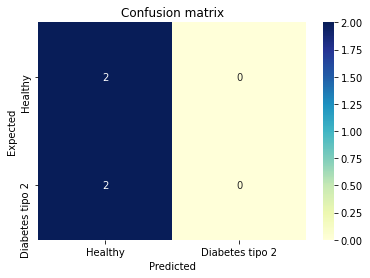

<Figure size 432x288 with 0 Axes>

In [163]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")